In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, [3, 4]].values

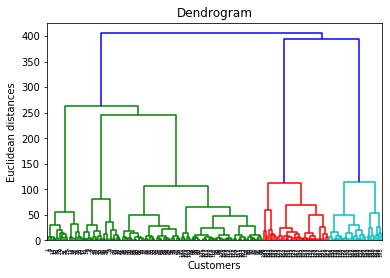

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

C:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).ep

Estimated number of clusters: 11


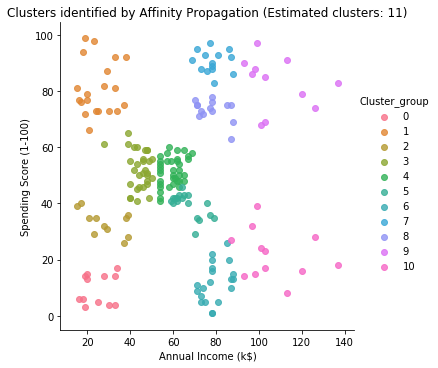

In [6]:
from sklearn.cluster import AffinityPropagation

# Perform Affinity Propagation
aff = AffinityPropagation()
y_aff = aff.fit_predict(X)

# Estimate the number of clusters
n_clusters = len(set(y_aff)) - (1 if -1 in y_aff else 0)  # Exclude noise points if any
print(f"Estimated number of clusters: {n_clusters}")

# Create DataFrame and add cluster labels
supervised = pd.DataFrame(dataset)
supervised['Cluster_group'] = y_aff

# Visualize the clusters
import seaborn as sns
import matplotlib.pyplot as plt

facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue='Cluster_group', 
                   fit_reg=False, legend=True, legend_out=True)
plt.title(f"Clusters identified by Affinity Propagation (Estimated clusters: {n_clusters})")
plt.show()
